src: https://www.analyticsvidhya.com/blog/2020/02/learn-image-classification-cnn-convolutional-neural-networks-3-datasets/

In [42]:
from keras.datasets import mnist
# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D
from keras.utils import np_utils


In [43]:

# loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# let's print the shape of the dataset
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [44]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [46]:
X_train.shape

(60000, 28, 28)

In [48]:
28*28

784

In [49]:
# Flattening the images from the 28x28 pixels to 1D 784 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [50]:
X_train.shape


(60000, 784)

In [52]:
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [56]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)


Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [57]:
# building a linear stack of layers with the sequential model
model = Sequential()
# hidden layer
model.add(Dense(100, input_shape=(784,), activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

# looking at the model summary
model.summary()
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.3802 - accuracy: 0.8956 - val_loss: 0.2165 - val_accuracy: 0.9383
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1804 - accuracy: 0.9490 - val_loss: 0.1533 - val_accuracy: 0.9552
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1321 - accuracy: 0.9626 - val_loss: 0.1208 - val_accuracy: 0.9641
Epoch 4/10
469/469 [

In [58]:
import numpy as np
# predict_x=model.predict(X_test) 
# classes_x=np.argmax(predict_x,axis=1)
y_predict = model.predict(X_test)


In [59]:
y_pred_enc = model.predict(X_test)

# decoding predicted values
y_pred = [np.argmax(i) for i in y_pred_enc]

print(y_pred_enc[0])
print(y_pred[0])

[8.5239101e-08 3.7519063e-10 9.9935078e-06 2.8911067e-04 6.6981348e-10
 8.4679431e-07 1.4188762e-14 9.9969459e-01 8.8445114e-07 4.4883895e-06]
7


In [60]:
# (X_test,Y_test)
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(y_predict, axis=1))
cm


array([[ 970,    0,    0,    1,    1,    0,    2,    2,    3,    1],
       [   0, 1120,    4,    1,    0,    1,    4,    1,    4,    0],
       [   6,    0, 1005,    4,    1,    0,    1,    8,    7,    0],
       [   0,    0,    5,  991,    1,    1,    0,    3,    3,    6],
       [   2,    0,    2,    0,  955,    0,    3,    7,    0,   13],
       [   2,    0,    0,   19,    1,  852,    8,    1,    6,    3],
       [   4,    3,    0,    1,    3,    2,  944,    0,    1,    0],
       [   0,    2,    7,    2,    0,    0,    0, 1010,    0,    7],
       [   4,    0,    3,    9,    4,    2,    4,    7,  936,    5],
       [   1,    2,    0,    4,    6,    2,    1,    6,    3,  984]])

In [61]:
print(classification_report(np.argmax(Y_test, axis=1), np.argmax(y_predict, axis=1)))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.99      0.96      0.97       892
           6       0.98      0.99      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.97      0.96      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



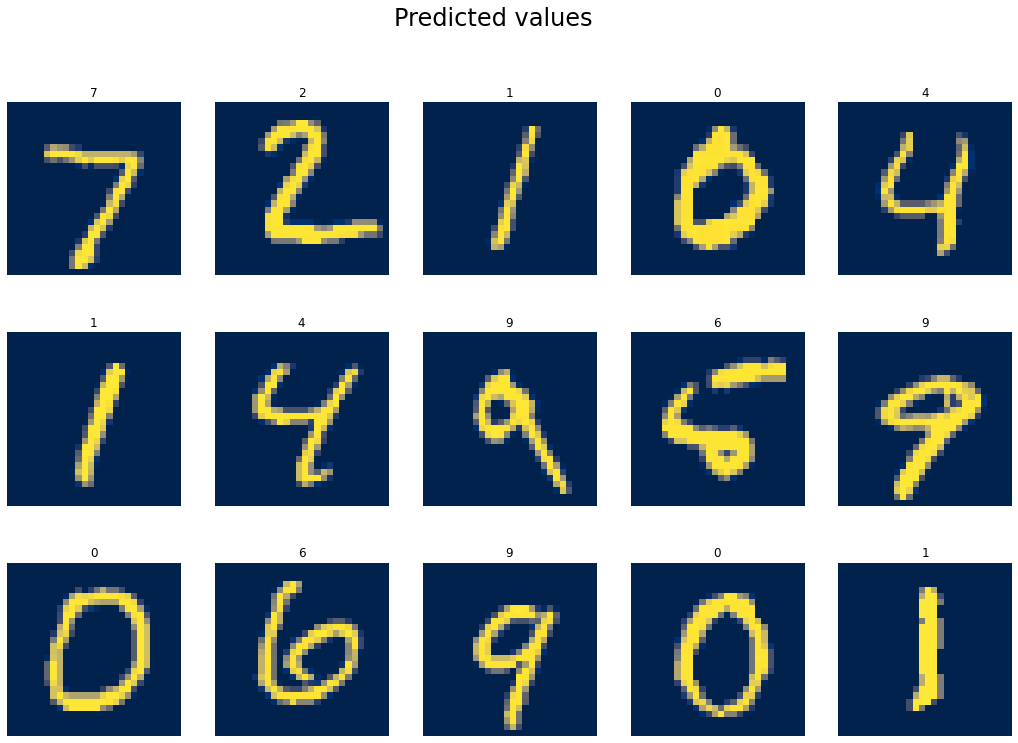

In [62]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(18, 12))
for ind, row in enumerate(X_test[:15]):
    plt.subplot(3, 5, ind+1)
    plt.title(y_pred[ind])
    img = row.reshape(28, 28)
    fig.suptitle('Predicted values', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='cividis')

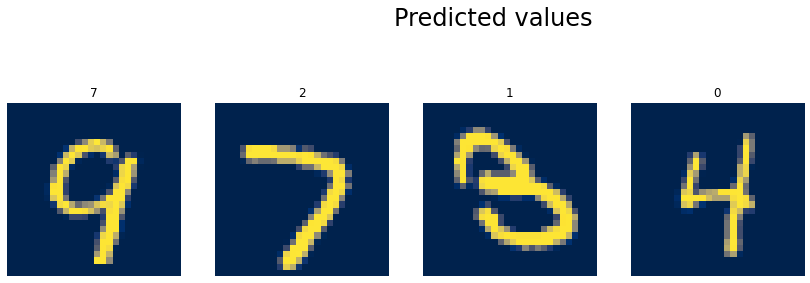

In [63]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(18, 12))
for ind, row in enumerate(X_test[16:20]):
    plt.subplot(3, 5, ind+1)
    plt.title(y_pred[ind])
    img = row.reshape(28, 28)
    fig.suptitle('Predicted values', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='cividis')

You can try:
- https://data-flair.training/blogs/cats-dogs-classification-deep-learning-project-beginners/
- https://www.analyticsvidhya.com/blog/2020/10/create-image-classification-model-python-keras/